In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname("__file__")), '..'))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from utils import data_handling, model_assessment
from ipywidgets import interact

## Setup visualization settings

In [2]:
plt.style.use('seaborn-paper')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['legend.handlelength'] = 2.0
minor_locator = AutoMinorLocator(4)

## Assess classification models' accuracy, precision, recall, and F1-score 

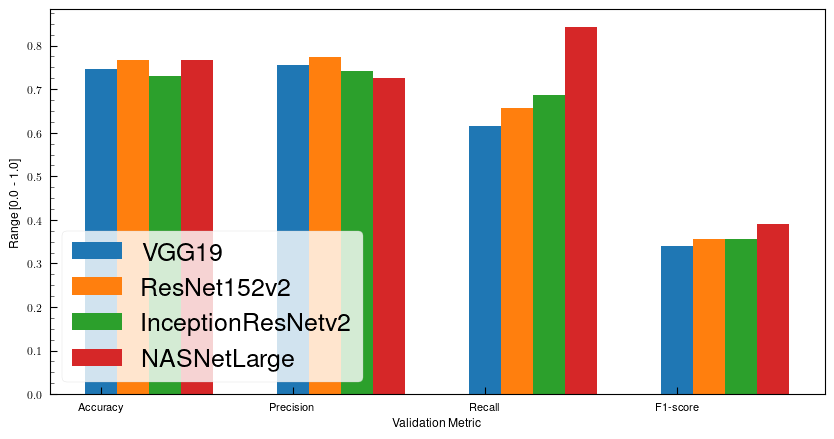

In [3]:
results_VGG19 = [0.7463, 0.7563, 0.6164]
results_VGG19.append(model_assessment.compute_F1_score(results_VGG19[1], results_VGG19[2]))

results_ResNet152v2 =  [0.7672, 0.7742, 0.6575]
results_ResNet152v2.append(model_assessment.compute_F1_score(results_ResNet152v2[1], results_ResNet152v2[2]))

results_InceptionResNetv2 = [0.7313, 0.7417, 0.6871]
results_InceptionResNetv2.append(model_assessment.compute_F1_score(\
    results_InceptionResNetv2[1], results_InceptionResNetv2[2]))

results_NASNetLarge = [0.7672, 0.7263, 0.8415]
results_NASNetLarge.append(model_assessment.compute_F1_score(\
    results_NASNetLarge[1], results_NASNetLarge[2]))

results = [results_VGG19, results_ResNet152v2, results_InceptionResNetv2, results_NASNetLarge]

fig, axs = plt.subplots(1, 1, figsize = (10,5))
model_name = ['VGG19', 'ResNet152v2', 'InceptionResNetv2', 'NASNetLarge']
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for i in range(4):
    width = 0.5
    xposition = [0.0 + i * width, 3.0 + i * width, 6.0 + i * width, 9.0 + i * width]
    rects = axs.bar(xposition, results[i], width, label = model_name[i])
xposition = [0.0, 3.0, 6.0, 9.0]
plt.xticks(xposition, labels)
axs.set_xlabel('Validation Metric')
axs.set_ylabel('Range [0.0 - 1.0]')
axs.yaxis.set_minor_locator(minor_locator)
axs.legend(model_name, loc = 'lower left')
plt.show()

## Load and prepare test data

In [4]:
cell_images, cell_labels, cell_types = data_handling.load_data_from_file('../data/labels.csv')

train_test_split = int(0.85 * cell_images.shape[0])
X_test, Y_test, Z_test = \
    cell_images[train_test_split : ], \
    cell_labels[train_test_split : ], cell_types[train_test_split : ]
X_test, Y_test, Z_test = data_handling.preprocess_data(X_test, Y_test, Z_test)

### Assess and visualize ROC curve and AUC

### Assess and visualize confusion matrix

### Assess and visualize class activation maps (CAMs)

In [5]:
@interact(n = (0, X_test.shape[0]))
def display_CAM(n = 0):
    cell_image = X_test[n]
    cam_output, prediction = model_assessment.compute_CAM(\
        '../models/weights/VGG19_1.00.00_ss.hdf5', cell_image, 'block5_conv4', (18, 18))

    fig, axs = plt.subplots(1, 1, figsize = (5,5))
    axs.imshow(cell_image, cmap = 'gray', alpha = 0.7)
    axs.imshow(cam_output, cmap = 'jet', alpha = 0.3)
    axs.set_title(f'Predict Probability: {prediction} - Actual Probability: {Y_test[n]} - Cell Type: {Z_test[n]}')

interactive(children=(IntSlider(value=0, description='n', max=394), Output()), _dom_classes=('widget-interact'…

In [8]:
@interact(n = (0, X_test.shape[0]))
def display_CAM(n = 0):
    cell_image = X_test[n]
    cam_output, prediction = model_assessment.compute_CAM(\
        '../models/weights/ResNet152v2_1.00.00_ss.hdf5', cell_image, 'post_relu', (10, 10))

    fig, axs = plt.subplots(1, 1, figsize = (5,5))
    axs.imshow(cell_image, cmap = 'gray', alpha = 0.7)
    axs.imshow(cam_output, cmap = 'jet', alpha = 0.3)
    axs.set_title(f'Predict Probability: {prediction} - Actual Probability: {Y_test[n]} - Cell Type: {Z_test[n]}')

interactive(children=(IntSlider(value=0, description='n', max=394), Output()), _dom_classes=('widget-interact'…